In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurancefirmdata/insurance.csv


**Table of Contents**
* Understanding Business Case
* Variable Description
* Data Understanding
* Data Cleaning
* Data Visualization

**1. Understanding Business Problem**

Our business case is to predict customer charges for an insurance company based on given variables. So that the company can decide how much they charge people correctly.


**2. Variable Description**

After understanding the business case, we need to know our variables before analyzing them. Thus we have a clear understanding as we go further.

We will use parameters from the dataset

Age: Age of the primary beneficiary
Sex: Insurance contractor gender, female, male
BMI: Body mass index, providing an understanding of the body, weights that are relatively high or low relative to height,
an objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
Children: Number of children covered by health insurance / Number of dependents
Smoker: Smoking
Region: the beneficiary’s residential area in the US, northeast, southeast, southwest and northwest.
Charges: Individual medical costs billed by health insurance

**3. Data Understanding **

importing necessary library required and understanding the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/kaggle/input/insurancefirmdata/insurance.csv')

In [4]:
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [8]:
df.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

df.describe() method generates descriptive statistics for us. For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50(median) and upper percentiles.

We can easily notice that the minimum age is 18 and the maximum age is 64. We can also see mean and median values of age are almost the same.

I also noticed that the maximum charge value is 63.770 which might be an unusual value. We can investigate this in the data visualization part.

( With describe method, we can also understand if our data is skewed or not looking at the range of quantiles )

In [9]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


We see that the most frequent value for sex is male and shown in the dataset 676 times.

There are 4 unique regions in our dataset and the most frequent value is southeast and 364 times counted in the data.

Most people are not smokers with a number of 1064 observations.**

**4. Data Cleaning**

​
In this part of the EDA. We will check ;
​
* Missing Values
* Duplicated Values
​
The purpose of data cleaning is to get our data ready to analyze and visualize.

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

When combining .isnull() method with .sum() we can sum up all the missing values for each variables.

Luckily, there are no missing values in this dataset. We will now proceed to analyze the data, observe patterns, and identify outliers with the help of visualization methods.

most datasets contains missing values so checking for missing values is must.

Now we will look for duplicated values.

In [11]:
df[df.duplicated(keep='first')]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Dataset has only one duplicated observation. We can simply drop this row using the drop_duplicates() method.

In [12]:
df.drop_duplicates(keep='first',inplace=True)

We use some attributes inside the parenthesis;

keep = ‘first’ is used to keep the first row of duplicated ones.

inplace = True is used to change the data frame permanently. If we didn't use inplace attributes, we would not remove the duplicated observation from the dataset.

**5. Data Visualization**

Now, We understood our dataset in general and checked the missing values. We also deleted duplicated values from the data frame.

The next part of this journey is data visualization! Our goal is to perform univariate, bivariate and multivariate analysis to see the distribution and relationship between variables.

We will use the seaborn library for statistical data visualization. Seaborn is a data visualization library based on matplotlib and my favorite with ease of use.

*Univariate Analysis*

The purpose of the univariate analysis is to understand the distribution of values for a single variable.

We can perform univariate analysis with 3 options :

* Summary Statistics
* Frequency Distributions Table
* Charts ( Boxplot, Histogram, Barplot, Pie Chart)

We will perform univariate analysis by using visualization techniques.

Univariate Analysis for Numerical Features

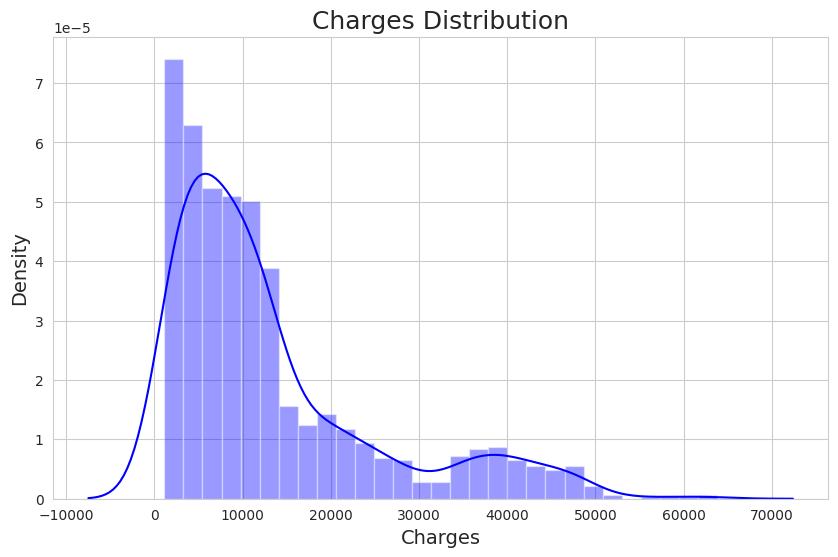

In [13]:
##charges
plt.figure(figsize=(10,6))
sns.distplot(df.charges,color='b')
plt.title('Charges Distribution', size=18)
plt.xlabel('Charges',size=14)
plt.ylabel('Density',size=14)
plt.show()

Let’s begin with sns.distplot() function. Displot stands for distribution plot and shows us distribution and kernel density estimation by default.

The distribution plot shows us how our variable is distributed.

On the other hand, kernel density estimation allows us to estimate the probability density function from the numerical variables. So that we can easily see the probability of getting each value visually.


> We see that our data looks like the right(positive) skewed. Most of the charges are between 0 – 10000 dollars.

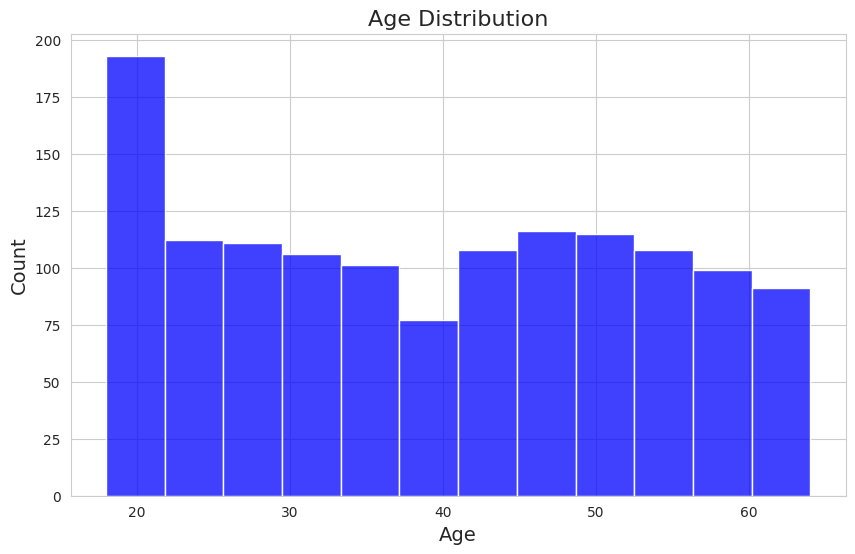

In [14]:
##age
plt.figure(figsize=(10,6))
sns.histplot(df.age,color='b')
plt.title('Age Distribution', size =16)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

**We see that most of the customers are 18–19 years old. The distribution looks like a uniform distribution.**

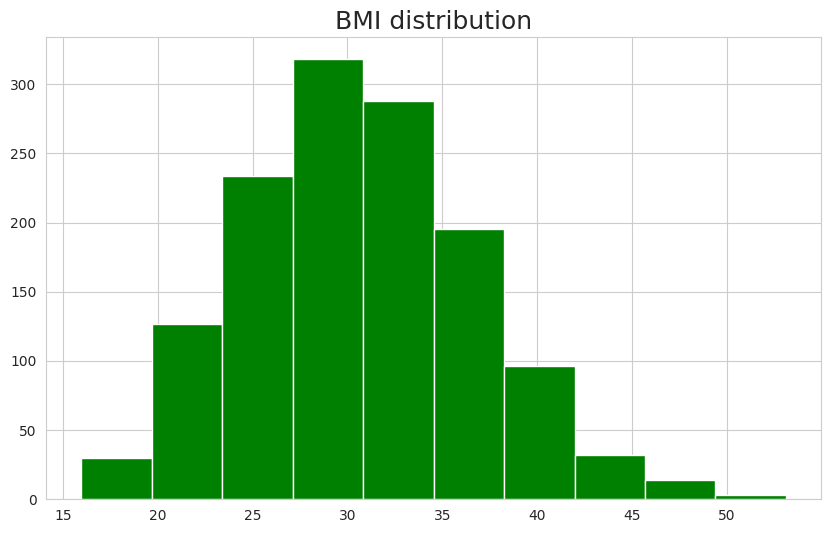

In [15]:
##bmi
plt.figure(figsize=(10,6))
plt.hist(df.bmi,color='g')
plt.title('BMI distribution',size=18)
plt.show()

As seen in the code block, Matplotlib also gives us an option to create a histogram.

> BMI of people seems like a normal distribution. That’s what we expected right? Most people have BMI between 27 -34 years old.

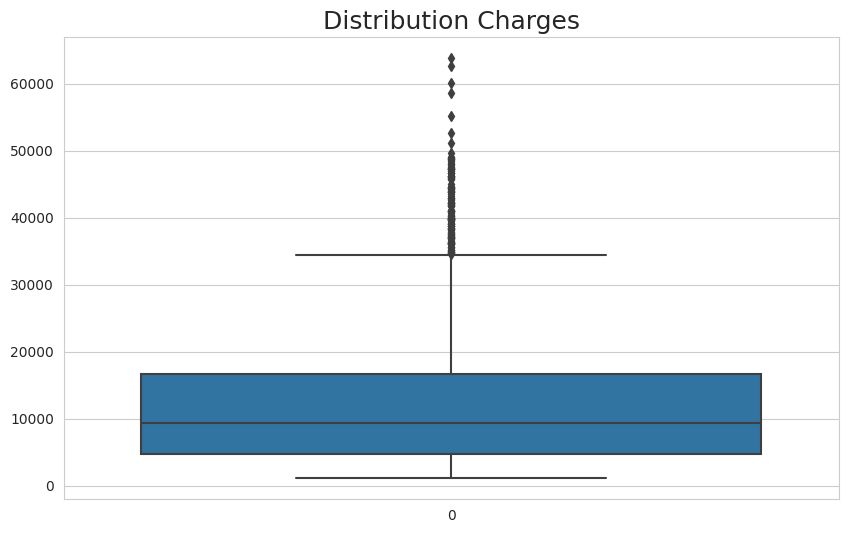

In [16]:
##boxplot for charges 
plt.figure(figsize=(10,6))
sns.boxplot(df.charges)
plt.title('Distribution Charges',size=18)
plt.show()

By using a boxplot, We can easily interpret our variable if it has outliers. Outliers can be easily removed from our dataset. But we reconsider before removing any of them.

We need to examine or ask domain expertise if they are anomalies or not.

A common way to remove outliers is to use IQR Method.

In [17]:
Q1=df['charges'].quantile(0.25)
Q3=df['charges'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

11911.37345


IQR = 11911.37345

After obtaining Inter Quantile Range, we can use the IQR method to see outliers or remove them from the dataset.

In [18]:
df[(df['charges']<Q1-1.5*IQR)|df['charges']>Q3+1.5*IQR]

,age,sex,bmi,children,smoker,region,charges


Now We can easily detect outliers with a boxplot or using python code. In this example. I will proceed with my analysis without removing outliers.
​

*Univariate Analysis for Categorical Features*

A bar chart is commonly used to visualize categorical features. We will use sns.countplot() method for sex, children, smoker and region variables.

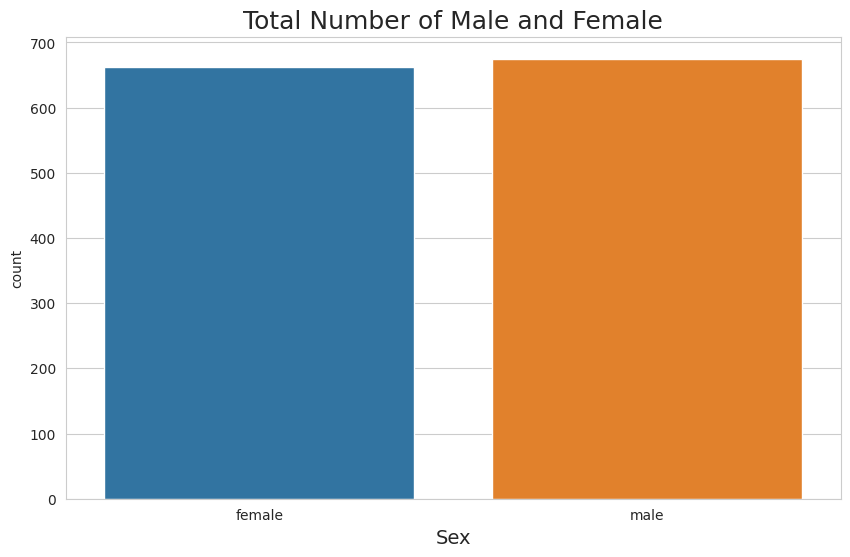

In [19]:
## Gender

plt.figure(figsize=(10,6))
sns.countplot(x = 'sex', data = df)
plt.title('Total Number of Male and Female',size=18)
plt.xlabel('Sex',size=14)
plt.show()

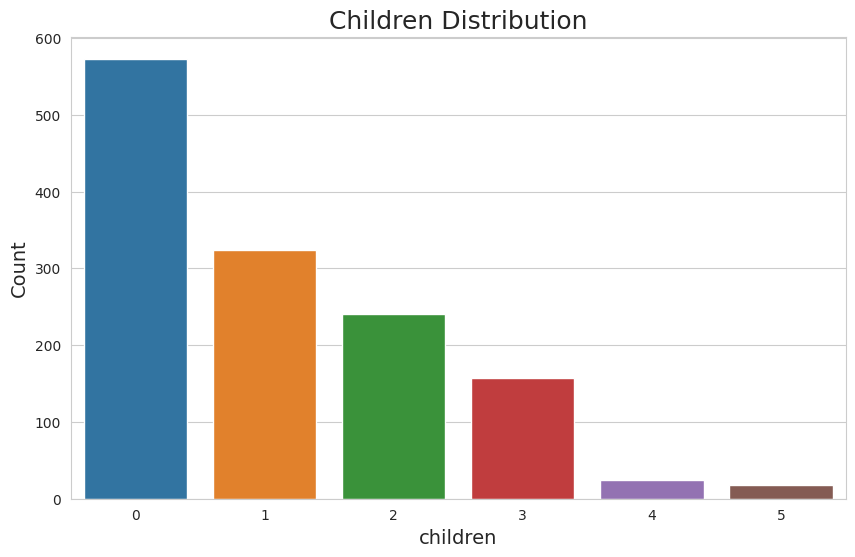

In [20]:
###CHILDREN
child_counts=df.children.value_counts()
#create  a bar plot of the child counts
plt.figure(figsize=(10,6))
sns.barplot(x=child_counts.index,y=child_counts.values)
plt.title('Children Distribution',size=18)
plt.xlabel('children',size=14)
plt.ylabel('Count',size=14)
plt.show()


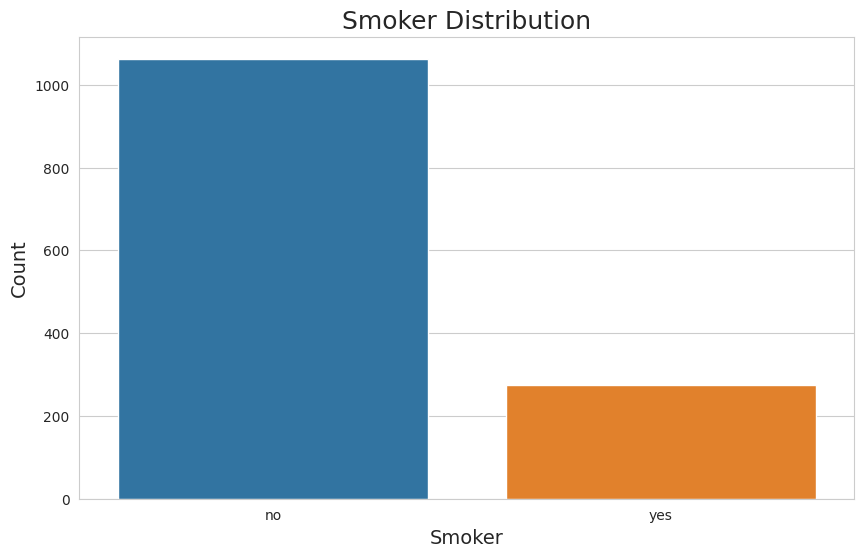

In [21]:
## Smoker



# Get the count of each unique value in the smoker column
smoker_count = df.smoker.value_counts()

# Create a bar plot of the smoker count
plt.figure(figsize=(10,6))
sns.barplot(x=smoker_count.index, y=smoker_count)
plt.title('Smoker Distribution', size=18)
plt.xlabel('Smoker', size=14)
plt.ylabel('Count', size=14)
plt.show()


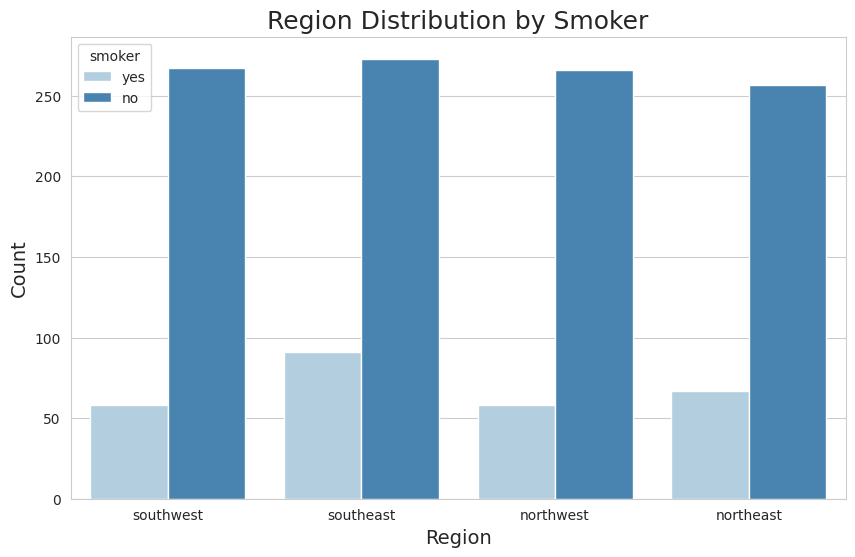

In [22]:
# Create a countplot of region with a hue for smoker
plt.figure(figsize=(10,6))
sns.countplot(x='region', data=df, hue='smoker', palette='Blues')
plt.title('Region Distribution by Smoker', size=18)
plt.xlabel('Region', size=14)
plt.ylabel('Count', size=14)
plt.show()


**Bivariate Analysis**

Bivariate analysis is the analysis of exactly two variables. We will use bivariate analysis to find relationships between two variables.

For bivariate analysis, we usually use boxplot(categorical vs numerical), scatterplot(numerical vs numerical), or contingency table(categorical vs categorical).

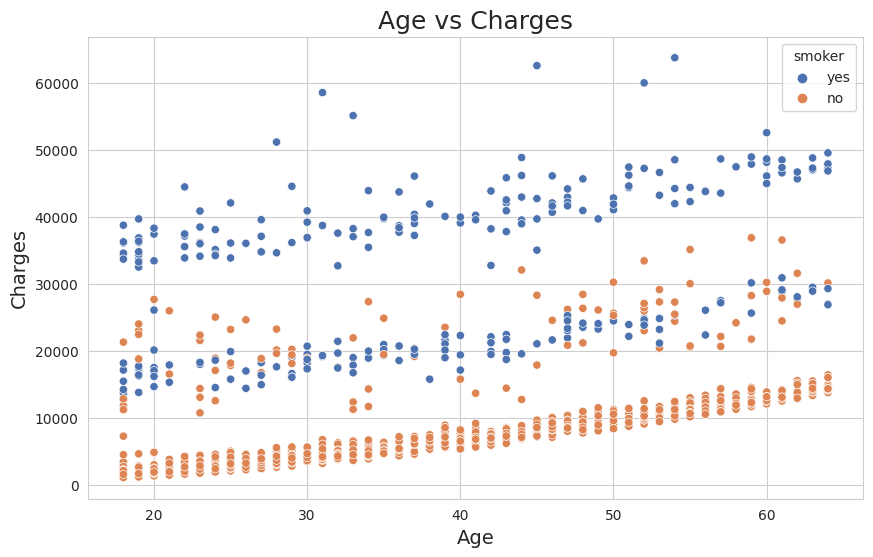

In [23]:
## Age vs Charges
## This also shows who is a smoker or not.

plt.figure(figsize = (10,6))
sns.scatterplot(x='age',y='charges',hue='smoker', data=df, palette='deep')
plt.title('Age vs Charges',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Charges',size=14)
plt.show()

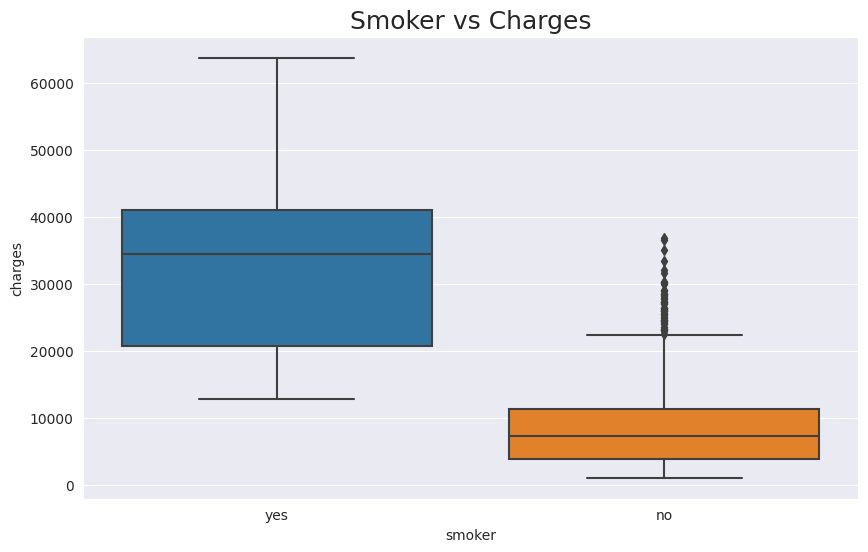

In [24]:
## Smoker Vs Charges

plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(x='smoker',y='charges',data=df)
plt.title('Smoker vs Charges',size=18);

The boxplot shows us the cost of insurance for smokers is higher than for non-smokers.


Pair plot is another awesome method that shows us the relationship between two numerical values as well as the distribution of each variable.

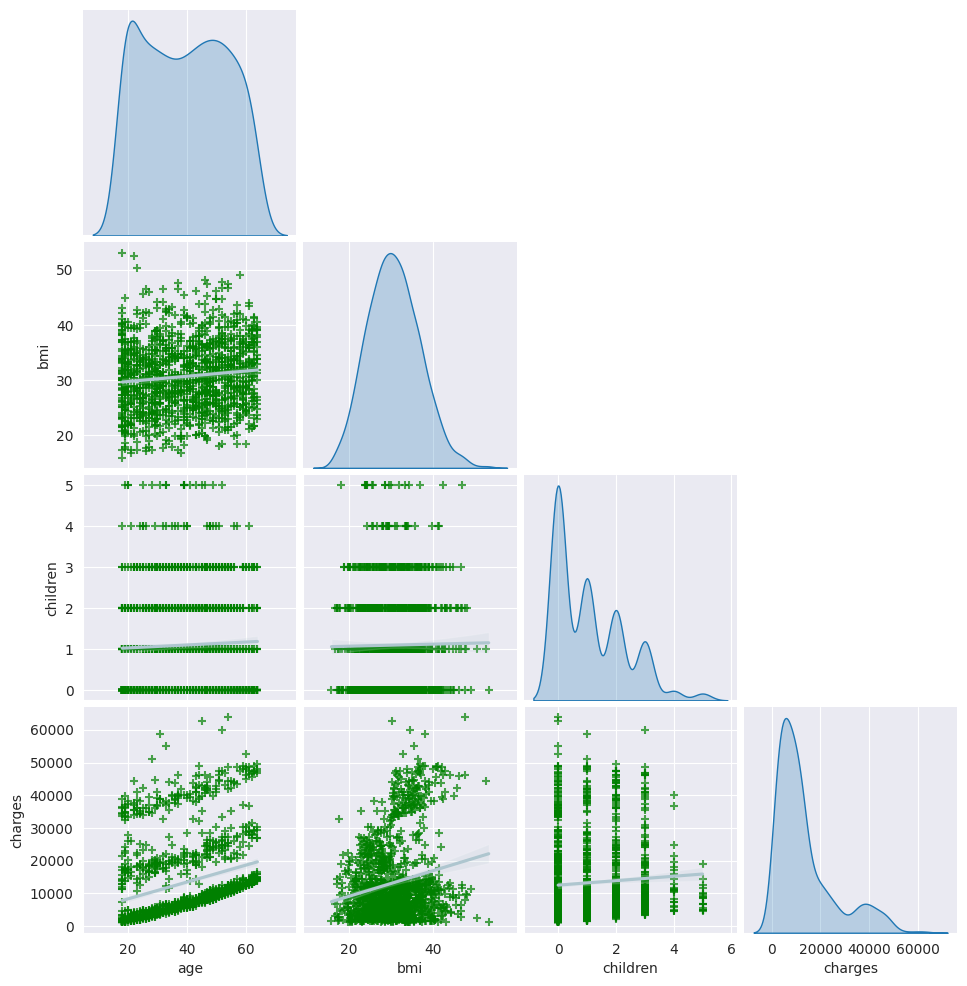

In [25]:
sns.pairplot(df, 
                 markers="+",
                 diag_kind="kde",
                 kind='reg',
                 plot_kws={'line_kws':{'color':'#aec6cf'}, 
                           'scatter_kws': {'alpha': 0.7, 
                                           'color': 'green'}},
                 corner=True);

**Correlation**


Correlation is used to test relationships between quantitative variables or categorical variables. It’s a measure of how things are related. The table above shows us how we can interpret correlation coefficients.

As we said earlier, seaborn is an awesome library that helps us visualize our variables easily and clearly. The heatmap() method shows us the relationship between numeric variables.

There are different methods to calculate correlation coefficient ;

1.Pearson
2.Kendall
3.Spearman
 
We will combine the .corr() method with heatmap so that we will be able to see the relationship in the graph. .corr() method is used Pearson correlation by default.

In [26]:
#heatmap of all df

#plt.figure(figsize=(10, 6))
#sns.heatmap(df.corr(), annot=True, square=True, cmap='RdBu', vmax=1, vmin=-1)
#plt.title('Correlations Between Variables', size=18)
#plt.xticks(size=13)
#plt.yticks(size=13)
#plt.show()

The heatmap shows us there is a correlation between age and charges. As the age increases insurance charges also increase or vice versa.

We can also see that there is a weak correlation between BMI and charges.

**Conclusion**


In this post, We examined our dataset using exploratory data analysis and try to understand each variable as well as their relationship with each other.

The main purpose of EDA is to help understand data before making any assumptions. EDA helps us to see distribution, summary statistics, relationships between variables and outliers.